In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from keras.models import Model,Sequential
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import keras
from scipy import signal
import cv2
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score
from natsort import natsorted

In [ ]:
data=pd.read_csv('drive/MyDrive/archive/sample_labels.csv')
x=[]
y=[]
for i in range(0, len(data["Finding Labels"])):
  a=cv2.imread('drive/MyDrive/archive/images/'+data["Image Index"][i])
  a=cv2.resize(a,(224,224))
  x.append(a)
  if(data["Finding Labels"][i]=='No Finding'):
    y.append(0)
  else:
    y.append(1)

In [ ]:
x=np.array(x)
y=np.array(y)
print(x.shape, y.shape)

(5606, 224, 224, 3) (5606,)


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
print(xtrain.shape)
print(ytrain.shape)

(4484, 224, 224, 3)
(4484,)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 7,562,817
Trainable params: 7,479,169
Non-trainable params: 83,648
_________________________________________________________________
Epoch 1/50
141/141 [==============================] - 118s 736ms/step - loss: 0.6882 - accuracy: 0.6008
Epoch 2/50
141/141 [==============================] - 104s 737ms/st

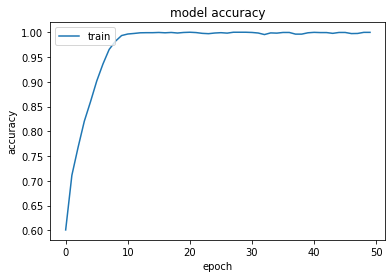

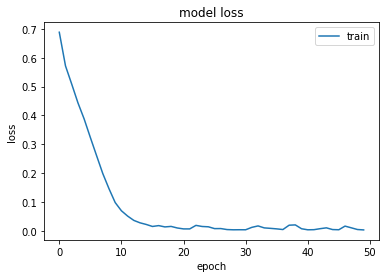

In [ ]:
encoder = tf.keras.applications.ResNet50(include_top=False,weights='imagenet',pooling= 'avg', input_shape=(224, 224, 3))
model1=keras.Sequential()
model1.add(encoder)
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()
opt=Adam(learning_rate=0.000009,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07)
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

history1= model1.fit(xtrain,ytrain,epochs=50)

print("\n")
ypred1=model1.predict(xtest)
for i in range(0,len(ypred1)):
  if(ypred1[i,0]>0.5):
    ypred1[i,0]=1
  else:
    ypred1[i,0]=0
acc1=accuracy_score(ytest, ypred1)
pr1, re1, f1, _ =precision_recall_fscore_support(ytest, ypred1, average='binary')
print("Precision:", pr1)
print("Recall:", re1)
print("F1score:", f1)
print("Accuracy:", acc1)
file = open("drive/MyDrive/history1.txt", "w")
var = repr(history1.history)
file.write(var)
file.close()

print("\n")
plt.plot(history1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
model1.save('drive/MyDrive/csMinorProject/xray.hdf5')

In [ ]:
yhat = model1.predict(xtest,verbose = 0)



[0 0 1 ... 1 1 0]
[[1.6662337e-02]
 [8.3440298e-04]
 [1.6837013e-04]
 ...
 [2.4724343e-01]
 [9.8830855e-01]
 [9.9976104e-01]]


In [ ]:
print(ytest)
print(yhat)
# print(ytest.shape)
# print(len(ytest))
count = 0

for i in range(len(ytest)):
  temp = 0
  if(yhat[i] >= 0.3):
      temp = 1
  if(temp == ytest[i]):
      count +=1
print(count)



print("accuracy on test data is " + str(count/(len(yhat))))


NameError: ignored